#                              Brazil COVID-19 Hospital Dataset

### TASK 1
## Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

In [66]:
!pip install tpot

In [67]:
# import libarieries 
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
# For Machine Learning models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from imblearn.under_sampling import RandomUnderSampler
from math import sqrt 
import warnings
import re
warnings.filterwarnings('ignore')
# Automatically creates and optimizes machine learning pipelines using genetic programming.
from sklearn.metrics import *
from tpot import TPOTClassifier

In [68]:
# Read the data
data= pd.read_excel('covid19_clinical_dataset.xlsx')
display(data.head())
display(data.shape)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(5644, 111)

In [69]:
# Check the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [70]:
# Summary Statistics
data.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


In [71]:
# Check the missing values
null = data.isnull().sum()

In [72]:
null[null > 0]

Hematocrit                            5041
Hemoglobin                            5041
Platelets                             5042
Mean platelet volume                  5045
Red blood Cells                       5042
                                      ... 
HCO3 (arterial blood gas analysis)    5617
pO2 (arterial blood gas analysis)     5617
Arteiral Fio2                         5624
Phosphor                              5624
ctO2 (arterial blood gas analysis)    5617
Length: 105, dtype: int64

In [73]:
# Treating the missing values
clean_cols = null[null < data.shape[0]/20].reset_index()
clean_cols.head()

,index,0
0,Patient ID,0
1,Patient age quantile,0
2,SARS-Cov-2 exam result,0
3,"Patient addmited to regular ward (1=yes, 0=no)",0
4,Patient addmited to semi-intensive unit (1=yes...,0


In [74]:
data_clean = data[clean_cols["index"]]
data_clean.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,44477f75e8169d2,13,negative,0,0,0
1,126e9dd13932f68,17,negative,0,0,0
2,a46b4402a0e5696,8,negative,0,0,0
3,f7d619a94f97c45,5,negative,0,0,0
4,d9e41465789c2b5,15,negative,0,0,0


# Let's check the summary statsitics again

In [75]:
data_clean.describe(include="all")

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
count,5644,5644.000000,5644,5644.000000,5644.000000,5644.000000
unique,5644,NaN,2,NaN,NaN,NaN
top,3073f2a33a2be85,NaN,negative,NaN,NaN,NaN
freq,1,NaN,5086,NaN,NaN,NaN
mean,NaN,9.318391,NaN,0.013997,0.008859,0.007264
std,NaN,5.777903,NaN,0.117489,0.093713,0.084929
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000
25%,NaN,4.000000,NaN,0.000000,0.000000,0.000000
50%,NaN,9.000000,NaN,0.000000,0.000000,0.000000
75%,NaN,14.000000,NaN,0.000000,0.000000,0.000000


# Correlation 

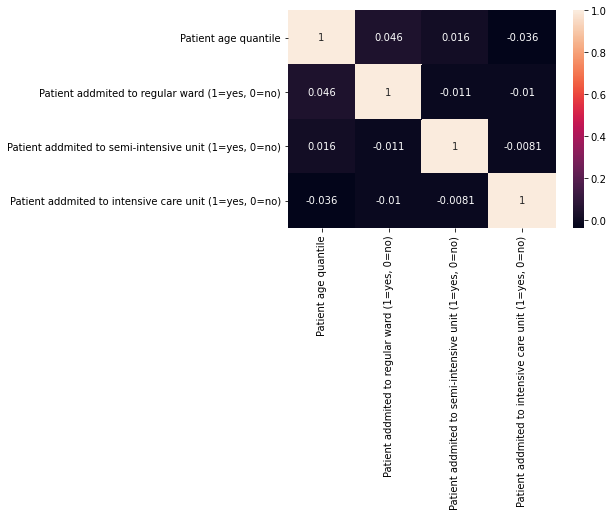

In [76]:
sns.heatmap(data_clean.corr(), annot=True)
plt.show()

''' From above plot we can say that leading 1 indicates that it has positive correaltion with each other '''

In [77]:
corr_matrix = data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[sol > 0.5]

pH (arterial blood gas analysis)       Phosphor                                 1.000000
Ferritin                               Lipase dosage                            1.000000
Serum Glucose                          Lipase dosage                            1.000000
Creatine phosphokinase (CPK)           Lipase dosage                            1.000000
Lactic Dehydrogenase                   Phosphor                                 1.000000
                                                                                  ...   
Patient age quantile                   Total CO2 (venous blood gas analysis)    0.503174
Metamyelocytes                         pCO2 (arterial blood gas analysis)       0.502687
Urine - Red blood cells                pO2 (arterial blood gas analysis)        0.502640
Total CO2 (venous blood gas analysis)  pH (arterial blood gas analysis)         0.502546
                                       pO2 (arterial blood gas analysis)        0.500594
Length: 220, dtype: f

# Check the counts

In [78]:
data.groupby("SARS-Cov-2 exam result").count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,520,520,519,518,519,...,14,14,14,14,14,14,14,11,19,14
positive,558,558,558,558,558,83,83,83,81,83,...,13,13,13,13,13,13,13,9,1,13


# Data Visualization

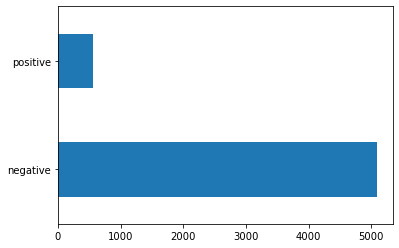

In [79]:
data['SARS-Cov-2 exam result'].value_counts().plot.barh()

# Data Analysis - Data Preparation

In [80]:
data['Urine - pH'].replace('Não Realizado', np.nan, inplace=True)

In [81]:
data['Urine - Leukocytes'].replace('<1000', '999', inplace=True)

In [82]:
data['Urine - pH'] = data['Urine - pH'].astype("float64")

In [83]:
data['Urine - Leukocytes'] = data['Urine - Leukocytes'].astype("float64")

In [84]:
data.dtypes[(data.dtypes == "object")].index

Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
       'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - Hemoglobin',
       'Urine - Bile pigments', 'Urine - Ketone Bodies', 'Urine - Nitrite',
       'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Crystals',
       'Urine - Hyaline cylinders', 'Urine - Granular cylinders',
       'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

# Let's remove unecessary columns

In [85]:
data_nop = data.drop([
    "Patient ID",
    'Patient addmited to regular ward (1=yes, 0=no)',
    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
    'Patient addmited to intensive care unit (1=yes, 0=no)'
], axis=1)

In [86]:
# Dummies for categorical column

In [87]:
data_result = pd.concat([data_nop, pd.get_dummies(data_nop[data_nop.dtypes[(data_nop.dtypes == "object")].index])], axis=1).drop(
    data_nop.dtypes[(data_nop.dtypes == "object")].index, axis=1).drop([
    'SARS-Cov-2 exam result_negative',
    'Respiratory Syncytial Virus_not_detected',
    'Influenza A_not_detected',
    'Influenza B_not_detected',
    'Parainfluenza 1_not_detected',
    'CoronavirusNL63_not_detected',
    'Rhinovirus/Enterovirus_not_detected',
    'Coronavirus HKU1_not_detected',
    'Parainfluenza 3_not_detected',
    'Chlamydophila pneumoniae_not_detected',
    'Adenovirus_not_detected',
    'Parainfluenza 4_not_detected',
    'Coronavirus229E_not_detected',
    'CoronavirusOC43_not_detected',
    'Inf A H1N1 2009_not_detected',
    'Bordetella pertussis_not_detected',
    'Metapneumovirus_not_detected',
    'Influenza B, rapid test_negative',
    'Influenza A, rapid test_negative',
    'Urine - Esterase_not_done',
    'Urine - Hemoglobin_not_done',
    'Urine - Hemoglobin_absent',
    'Strepto A_not_done',
    'Urine - Bile pigments_not_done',
    'Urine - Ketone Bodies_not_done',
    'Urine - Nitrite_not_done',
    'Urine - Urobilinogen_not_done',
    'Urine - Protein_not_done'
], axis=1)

In [88]:
# Generate List
list(data_result.columns)

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Mycoplasma pneumoniae',
 'Neutrophils',
 'Urea',
 'Proteina C reativa mg/dL',
 'Creatinine',
 'Potassium',
 'Sodium',
 'Alanine transaminase',
 'Aspartate transaminase',
 'Gamma-glutamyltransferase\xa0',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Indirect Bilirubin',
 'Alkaline phosphatase',
 'Ionized calcium\xa0',
 'Magnesium',
 'pCO2 (venous blood gas analysis)',
 'Hb saturation (venous blood gas analysis)',
 'Base excess (venous blood gas analysis)',
 'pO2 (venous blood gas analysis)',
 'Fio2 (venous blood gas analysis)',
 'Total CO2 (venous blood gas analysis)',
 'pH (venous blood gas analysis)',
 'HCO3 (ve

### Make a pipeline with undersampling, scaler, imputer and feature selection

In [89]:
def make_pipeline(x, y, model=RandomForestClassifier(random_state=42)):

    pipeline = Pipeline([
        ('inputer', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('normalizer', StandardScaler()),
        ('feature', SelectFromModel(RandomForestClassifier(random_state=42))),
        ('clf', model)
    ])
    sampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(x, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                   y_resampled,
                                                   test_size = 0.3,
                                                   random_state = 42)
    return (pipeline.fit(X_train, y_train), X_test, y_test)

In [90]:
x, y = (data_result.drop('SARS-Cov-2 exam result_positive', axis=1), data_result['SARS-Cov-2 exam result_positive'])

# RANDOM FOREST

## PRECISION MECHANISM

#### Precision tells us how relevant are the positive detections. Higher the precision better is our detection mechanism.

In [91]:
# Predicting COvid-19

In [92]:
rfmodel,X_test, y_test = make_pipeline(x, y)

In [93]:
rfmodel.score(X_test, y_test)

0.5880597014925373

In [94]:
print(classification_report(rfmodel.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.37      0.69      0.49        94
           1       0.82      0.55      0.66       241

    accuracy                           0.59       335
   macro avg       0.60      0.62      0.57       335
weighted avg       0.69      0.59      0.61       335



# Genetic Algorithm

In [96]:
tpot = TPOTClassifier(generations=1, verbosity=2, random_state=42, scoring="precision")
tmodel, X_test, y_test = make_pipeline(x, y, tpot)


Generation 1 - Current best internal CV score: 0.8064179104477611

Best pipeline: SGDClassifier(MinMaxScaler(input_matrix), alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=1.0, learning_rate=constant, loss=squared_hinge, penalty=elasticnet, power_t=10.0)


In [97]:
tmodel.score(X_test, y_test)

0.5714285714285714

In [98]:
print(classification_report(tmodel.predict(X_test), y_test)) 

              precision    recall  f1-score   support

           0       0.78      0.55      0.65       244
           1       0.32      0.57      0.41        91

    accuracy                           0.56       335
   macro avg       0.55      0.56      0.53       335
weighted avg       0.65      0.56      0.58       335



In [99]:
tmodel["clf"].export("best_model.py")

In [101]:
with open("best_model.py") as best_model:
    print(best_model.read())

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.8064179104477611
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    SGDClassifier(alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=1.0, learning_rate="constant", loss="squared_hinge", penalty="elasticnet", power_t=10.0)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exp

In [102]:
from sklearn.linear_model import SGDClassifier
best_model = SGDClassifier(
    alpha=0.01, eta0=1.0, fit_intercept=True, l1_ratio=1.0, learning_rate="invscaling", loss="modified_huber", penalty="elasticnet", power_t=0.0)
bmodel, X_test, y_test = make_pipeline(x, y, best_model)

In [103]:
bmodel.score(X_test, y_test)

0.5552238805970149

In [104]:
print(classification_report(bmodel.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.20      0.78      0.32        45
           1       0.94      0.52      0.67       290

    accuracy                           0.56       335
   macro avg       0.57      0.65      0.49       335
weighted avg       0.84      0.56      0.62       335



# Conclusion

After doing analysis and preparing the models we come to conclude that precison for Genetic Algorithm is good which  is 94%.

In [135]:
# Save the model
import joblib
joblib.dump(bmodel,'submission.pkl')

['submission.pkl']